In [1]:
import os
import json
import pandas
import numpy as np
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.externals import joblib
% matplotlib inline

In [2]:
Ned = []
Med = []
NRd = []
MRd = []
fck = []
As = []
bh = []
a = []
xu = []
l0 = []
listdir = os.listdir("../../data_set/buckling")


for file in listdir:
    f = open("../../data_set/buckling/" + file)
    d = json.loads(f.read())
    f.close()

    for o in d:
        Ned.append(o["Ned"])
        #Med.append(o["Med"])
        #NRd.append(o["NRd"])
        #MRd.append(o["MRd"])
        fck.append(o["fck"])
        As.append(o["As"])
        bh.append(o["bh"])
        #a.append(o["a"])
        #xu.append(o["xu"])
        l0.append(o["l0"])

rho = []
for i in range(len(As)):
    rho.append(As[i] / bh[i]**2)

In [3]:
df = pandas.DataFrame({
        "l0": l0,
        "Ned": Ned,
        "fck": fck,
        "bh": bh,
        "rho": rho,
    }
    )
print(df.shape)
df = df[df["fck"] == 20]
print(df.shape)
df.head(5)

(195333, 5)
(63168, 5)


,Ned,bh,fck,l0,rho
0,100000,250,20,2581.442640,0.004800
3,100000,275,20,3058.216260,0.003967
6,100000,300,20,3579.266366,0.003333
9,100000,325,20,4144.790181,0.002840
12,100000,350,20,4754.927524,0.002449


In [4]:
# Scale all features by their mean and std-dev to value 0 - 1. This is the correct one.

feat_df = df[[ "rho", "Ned", "l0"]]
res_df = df[["bh"]]

scale_feat = preprocessing.MinMaxScaler()
scale_feat.fit(feat_df)
print(scale_feat.transform(feat_df))

scale_res = preprocessing.MinMaxScaler()
scale_res.fit(res_df)
df = df.sample(frac=1)


[[ 0.1088725   0.          0.07604   ]
 [ 0.0877827   0.          0.09626788]
 [ 0.07174218  0.          0.11837425]
 ..., 
 [ 0.01866161  0.31010453  0.23207903]
 [ 0.01210865  0.31010453  0.24847984]
 [ 0.00842993  0.31010453  0.26624585]]


In [5]:
split = int(40e3)
df_train = df[:split]
df_test = df[split:]
df_train.head(5)

print(df_train.shape, df_test.shape)
df_train.head(15)

(40000, 5) (23168, 5)


,Ned,bh,fck,l0,rho
11005,1150000,375,20,1595.256888,0.002133
131876,2740000,700,20,3440.676492,0.000612
81308,2100000,525,20,2243.493717,0.001088
135511,2790000,575,20,2321.885711,0.000907
144198,2970000,425,20,1559.574502,0.010796
146495,310000,775,20,13504.765439,0.003163
148395,340000,775,20,12837.018658,0.002997
69770,1940000,500,20,2261.336097,0.003400
181876,860000,500,20,3190.638569,0.001200
5024,1070000,700,20,5505.886225,0.000612


In [6]:
train_feat = scale_feat.transform(df_train[["rho", "Ned", "l0"]])
train_label = df_train["bh"].as_matrix()
test_feat = scale_feat.transform(df_test[["rho", "Ned", "l0"]])
test_label = df_test["bh"].as_matrix()

print("Training features:\n rho, Ned, l0\n")
print(train_feat[:5])

print("\nTraining labels:\n bh\n")
print(train_label[:5])


print("\nTraining data:", train_feat.shape, train_label.shape)
print("\nTesting data:", test_feat.shape, test_label.shape)



Training features:
 rho, Ned, l0

[[ 0.04136284  0.36585366  0.03419951]
 [ 0.00285478  0.91986063  0.11249436]
 [ 0.01491007  0.69686411  0.06170198]
 [ 0.01032626  0.93728223  0.06502789]
 [ 0.26066411  1.          0.03268563]]

Training labels:
 bh

[375 700 525 575 425]

Training data: (40000, 3) (40000,)

Testing data: (23168, 3) (23168,)


In [7]:
X = train_feat
y = train_label
y = np.reshape(y, y.shape[0])

In [1]:
m = MLPRegressor(max_iter=300, learning_rate="adaptive", verbose=True, early_stopping=True)
m.fit(X, y)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: 

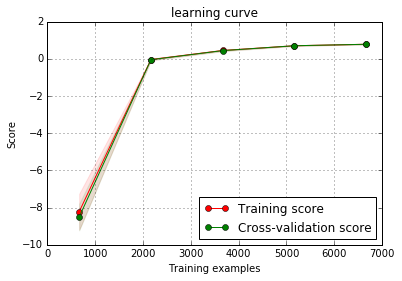

In [9]:
                                             
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(MLPRegressor(), "learning curve", X[:int(1e4)], y[:int(1e4)])
plt.show()

In [14]:
# Test
test_feat = scale_feat.transform(df_test[["rho", "Ned", "l0"]])
test_res = df_test[["bh"]].as_matrix()

pred = m.predict(test_feat)

for i in range(10):
    print("Prediction :", int(pred[i]), "Computed: ", test_res[i][0], "Deviation: %s%%" % (round(1 - (pred[i] / test_res[i])[0], 2) * 100)) 

Prediction : 401 Computed:  400 Deviation: -0.0%
Prediction : 721 Computed:  725 Deviation: 1.0%
Prediction : 374 Computed:  375 Deviation: 0.0%
Prediction : 381 Computed:  375 Deviation: -2.0%
Prediction : 370 Computed:  375 Deviation: 1.0%
Prediction : 722 Computed:  725 Deviation: 0.0%
Prediction : 595 Computed:  600 Deviation: 1.0%
Prediction : 541 Computed:  550 Deviation: 2.0%
Prediction : 495 Computed:  500 Deviation: 1.0%
Prediction : 673 Computed:  675 Deviation: 0.0%


In [15]:
dev = 0
for i in range(pred.shape[0]):
    dev += abs(1 - (pred[i] / test_res[i])[0])

print("Total accuracy %s%%" % (100 - round(dev / pred.shape[0] * 100, 2)))


Total accuracy 98.7%


In [12]:
input = {
    "rho": [0.0005],
    "Ned": [2250e3],
    "l0": [5e3],
}

for i in input:
    input[i].append(0)

inp = pandas.DataFrame(input)
print(inp.head())

X = scale_feat.transform(inp[["rho", "Ned", "l0"]])
print("\nPrediction:", m.predict(X)[:-1])

h = m.predict(X)[:-1]
ac = h**2
as_ = ac * input["rho"][0]


n = input["Ned"][0] / (ac * 20 + as_ * 435)
ylim = 10.8 / n**0.5

print("ylim", ylim)
print("y", input["l0"][0] / ( h / 3.46 ))

       Ned    l0     rho
0  2250000  5000  0.0005
1        0     0  0.0000

Prediction: [ 815.99110285]
ylim [ 26.41688744]
y [ 21.20121156]
